<a href="https://colab.research.google.com/github/SanjayGanapathy/HousePricePrediction/blob/main/MIT_URTC_Project_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Imports**

In [ ]:
!pip install shap

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import StackingRegressor
import shap
from sklearn.model_selection import GridSearchCV

# **Load In Dataset**

In [ ]:
train_data = pd.read_csv('train.csv')

# **Exploratory Data Analysis (EDA)**

In [ ]:
train_data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
train_data.shape

(1460, 81)

# **Data Preprocessing**

In [ ]:
# Drop columns with many missing values
cols_to_drop = ['Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
                'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical',
                'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
                'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', '3SsnPorch']
train_data.drop(cols_to_drop, axis=1, inplace=True)

# Handle categorical columns
categorical_columns = [
    "MSZoning", "Street", "LotShape", "LandContour", "Utilities", "LotConfig",
    "LandSlope", "Neighborhood", "Condition1", "Condition2", "BldgType",
    "HouseStyle", "RoofStyle", "RoofMatl", "Exterior1st", "Exterior2nd",
    "ExterQual", "ExterCond", "Foundation", "Heating", "HeatingQC",
    "CentralAir", "KitchenQual", "Functional", "PavedDrive", "SaleType",
    "SaleCondition"
]


train_data = pd.get_dummies(train_data, columns=categorical_columns)



# Feature Engineering
train_data["TotalSF"] = train_data["1stFlrSF"] + train_data["2ndFlrSF"] + train_data["TotalBsmtSF"]

# Select columns for modeling
features = train_data.columns.difference(["SalePrice"])
X = train_data[features]
y = train_data["SalePrice"]

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='median')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Standardize features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **Standardized Evaluations**

## Standardized Evaluation Metrics

In [ ]:
def evaluation_metrics(y_test, y_pred):
  r2 = r2_score(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)
  rmse = mean_squared_error(y_test, y_pred, squared=False)

  print(f"R2 Score: {r2}")
  print(f"Mean Absolute Error: {mae}")
  print(f"Root Mean Squared Error: {rmse}")

  # Display a table of actual vs. predicted prices
  results_df = pd.DataFrame({'Actual Prices': y_test, 'Predicted Prices': y_pred})
  print(results_df)

# Standardized Visualization

In [ ]:
def visualize_results(y_test, y_pred):
  # Scatter plot for actual vs. predicted prices
  plt.scatter(y_test, y_pred, c='b', label='Actual vs. Predicted Prices')
  plt.xlabel("Actual Prices")
  plt.ylabel("Predicted Prices")
  plt.title("Actual vs. Predicted House Prices")
  plt.legend()
  plt.grid(True)
  plt.show()

# **Single Layer Regression Model Comparisons**

# Random Forest Regression

R2 Score: 0.9092958865027854
Mean Absolute Error: 16350.109726027398
Root Mean Squared Error: 24294.611767483282
      Actual Prices  Predicted Prices
930          201000     222465.760000
530          175000     199842.053333
1291         119500     118389.146667
1385         125500     118025.133333
305          305900     344059.213333
...             ...               ...
453          210000     206614.573333
678          372500     342894.693333
190          315000     269646.920000
748          260400     257769.133333
1335         167900     170635.106667

[292 rows x 2 columns]


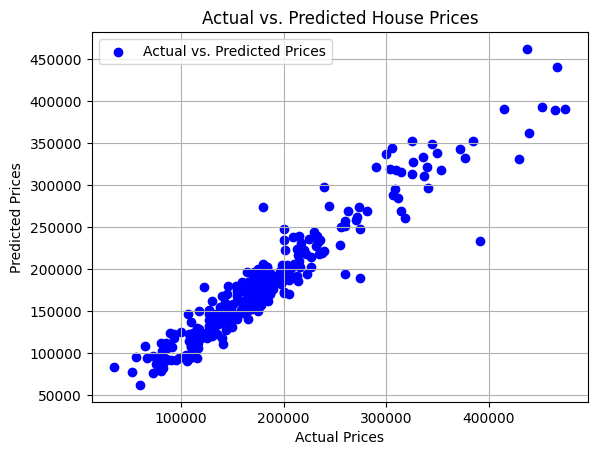

In [ ]:
# Create a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=75, random_state=50)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

evaluation_metrics(y_test, y_pred)
visualize_results(y_test, y_pred)

# Tensorflow Keras NN

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 39943819264.0000
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 40543571968.0000
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 39193124864.0000
Epoch 4/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 37128912896.0000
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 37284642816.0000
Epoch 6/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 38289870848.0000
Epoch 7/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 40210132992.0000
Epoch 8/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 37776818176.0000
Epoch 9/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 37138518016.0000
Epoch 10/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 35653021696.0000
Epoch 11/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 38635196416.0000
Epoch 12/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 36166037504.0000
Epoch 13/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 34357155840.0000
Epoch 14/50
37/37 ━━

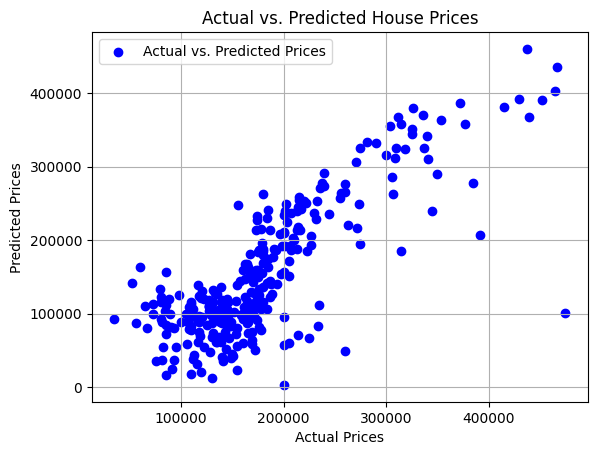

In [ ]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer with 1 neuron for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=1)

# Make predictions on the test data
y_pred = model.predict(X_test_scaled).flatten()

evaluation_metrics(y_test, y_pred)
visualize_results(y_test, y_pred)

# Gradient Boosting Regression

R2 Score: 0.905969864380916
Mean Absolute Error: 15979.862427675025
Root Mean Squared Error: 24736.03023348437
      Actual Prices  Predicted Prices
930          201000     216150.769874
530          175000     190151.085549
1291         119500     113291.766831
1385         125500     120994.968678
305          305900     331472.069695
...             ...               ...
453          210000     224484.978520
678          372500     303737.013096
190          315000     306454.313559
748          260400     245526.564013
1335         167900     159043.386847

[292 rows x 2 columns]


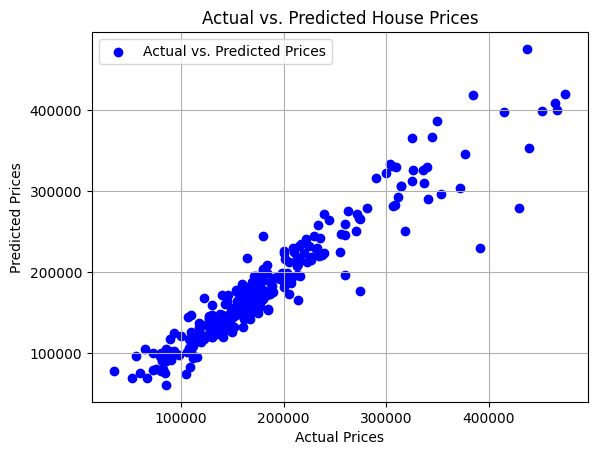

In [ ]:
# Create a Gradient Boosting Regressor model
model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)
evaluation_metrics(y_test, y_pred)
visualize_results(y_test, y_pred)

# Support Vector Regression

R2 Score: 0.9007742822688778
Mean Absolute Error: 16426.995746905966
Root Mean Squared Error: 25410.230013198692
      Actual Prices  Predicted Prices
930          201000     223072.900398
530          175000     195074.134474
1291         119500     127438.211434
1385         125500     126648.194567
305          305900     276136.192237
...             ...               ...
453          210000     210288.759939
678          372500     294720.889385
190          315000     264155.759693
748          260400     262637.701767
1335         167900     164565.670064

[292 rows x 2 columns]


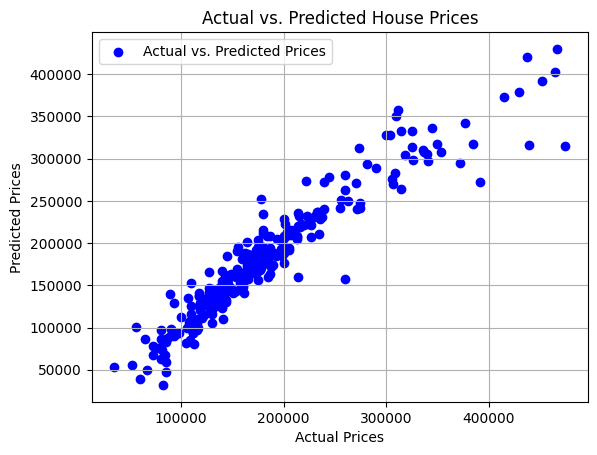

In [ ]:
model = SVR(kernel='linear', C=1000)

# Train the model on the training data
model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_scaled)
evaluation_metrics(y_test, y_pred)
visualize_results(y_test, y_pred)

# Regression Stacking Ensemble model

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import StackingRegressor
import shap
import matplotlib.pyplot as plt

# Load the training data
train_data = pd.read_csv('train.csv')

# Drop columns with many missing values
cols_to_drop = ['Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
                'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical',
                'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
                'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', '3SsnPorch']
train_data.drop(cols_to_drop, axis=1, inplace=True)

# Handle categorical columns
categorical_columns = [
    "MSZoning", "Street", "LotShape", "LandContour", "Utilities", "LotConfig",
    "LandSlope", "Neighborhood", "Condition1", "Condition2", "BldgType",
    "HouseStyle", "RoofStyle", "RoofMatl", "Exterior1st", "Exterior2nd",
    "ExterQual", "ExterCond", "Foundation", "Heating", "HeatingQC",
    "CentralAir", "KitchenQual", "Functional", "PavedDrive", "SaleType",
    "SaleCondition"
]

train_data = pd.get_dummies(train_data, columns=categorical_columns)

# Feature Engineering
train_data["TotalSF"] = train_data["1stFlrSF"] + train_data["2ndFlrSF"] + train_data["TotalBsmtSF"]

# Select columns for modeling
features = train_data.columns.difference(["SalePrice"])
X = train_data[features]
y = train_data["SalePrice"]

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='median')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Hyperparameter tuning for RandomForestRegressor
param_grid_rfr = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search_rfr = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rfr, cv=5, n_jobs=-1)
grid_search_rfr.fit(X_train, y_train)
best_rfr = grid_search_rfr.best_estimator_

# Hyperparameter tuning for GradientBoostingRegressor
param_grid_gbr = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}
grid_search_gbr = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid_gbr, cv=5, n_jobs=-1)
grid_search_gbr.fit(X_train, y_train)
best_gbr = grid_search_gbr.best_estimator_

# Hyperparameter tuning for SVR
param_grid_svr = {
    'C': [0.1, 1, 10],
    'epsilon': [0.1, 0.2, 0.5]
}
grid_search_svr = GridSearchCV(SVR(kernel='linear'), param_grid_svr, cv=5, n_jobs=-1)
grid_search_svr.fit(X_train, y_train)
best_svr = grid_search_svr.best_estimator_

# Create stacking regressor
stacking_model = StackingRegressor(estimators=[
    ('rfr', best_rfr),
    ('gbr', best_gbr),
    ('svr', best_svr)
], final_estimator=LinearRegression())

# Train stacking model
stacking_model.fit(X_train, y_train)

# Make predictions
stacking_pred = stacking_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


 95%|=================== | 278/292 [00:14<00:00]       

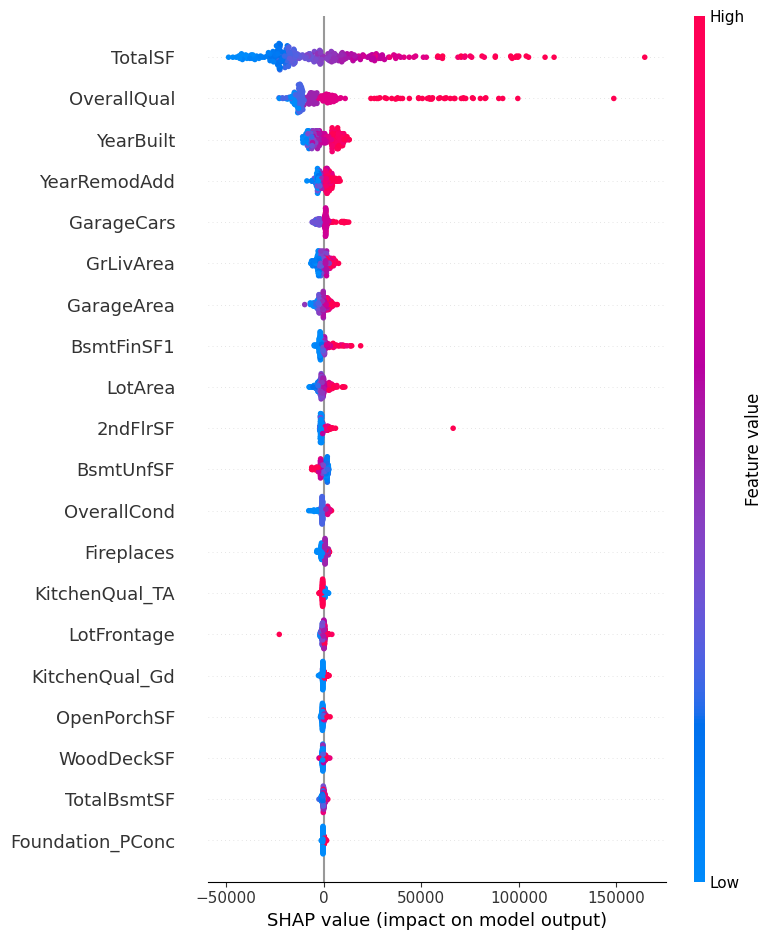

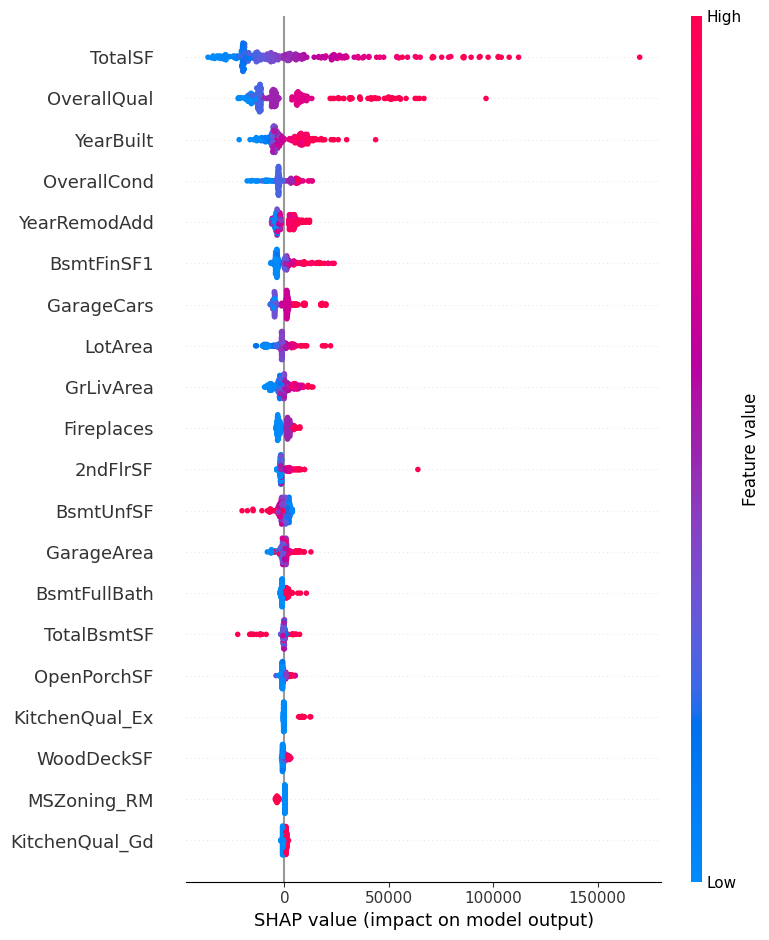

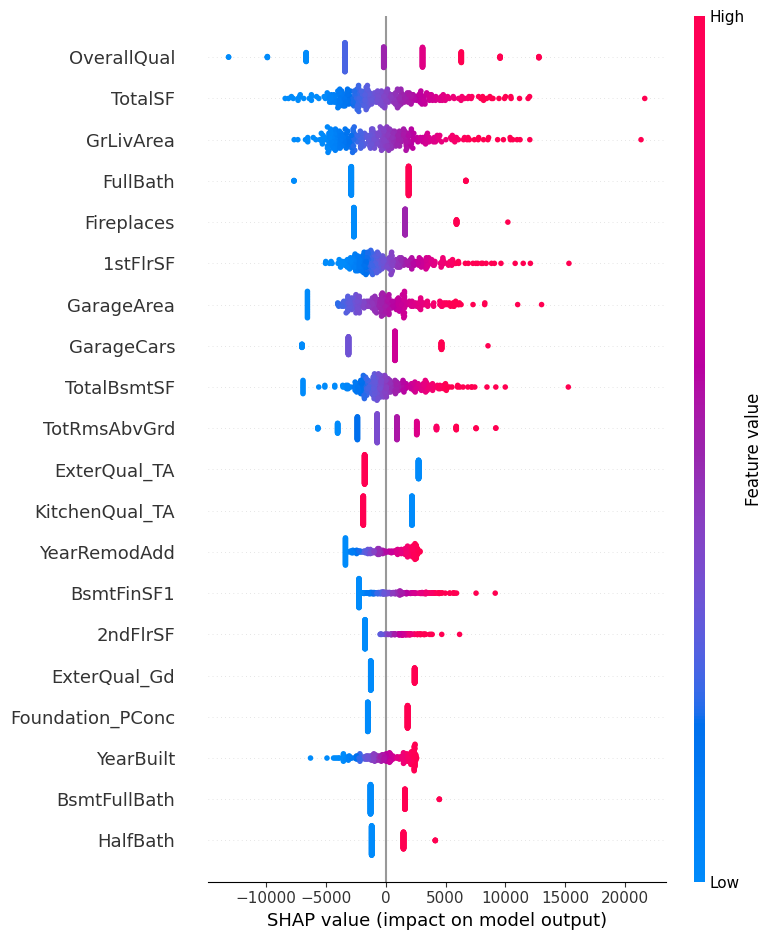

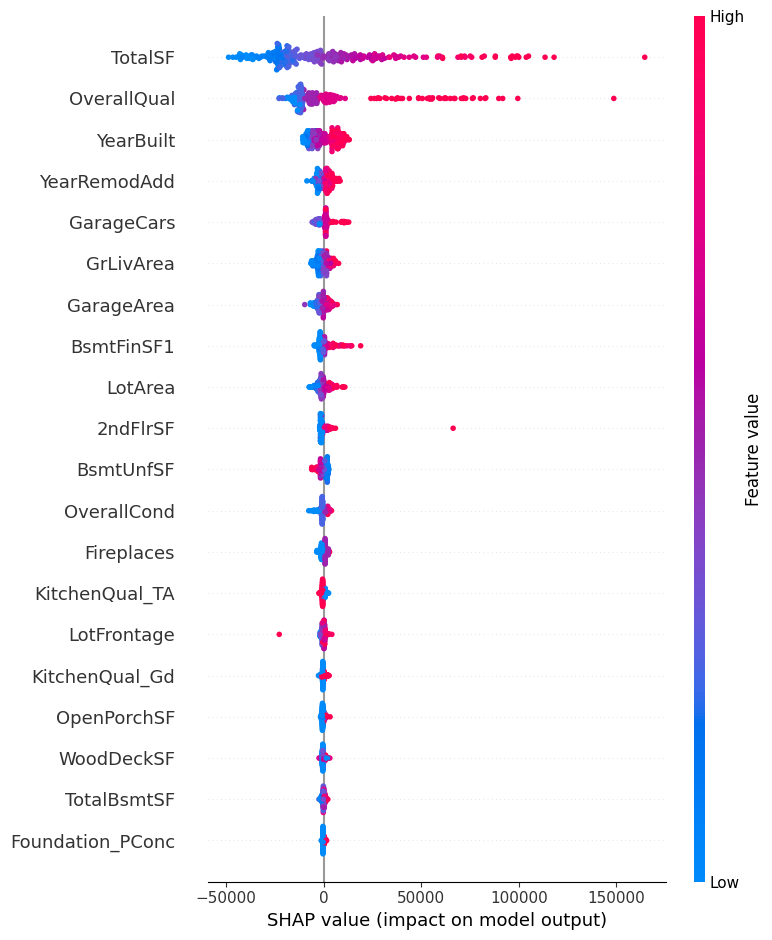

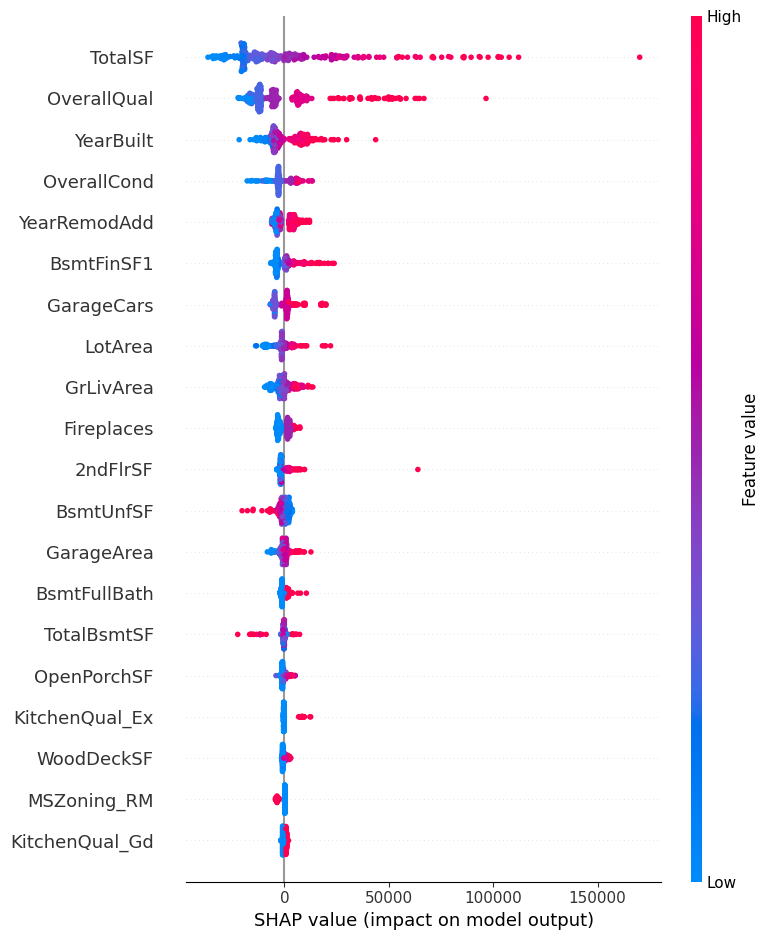

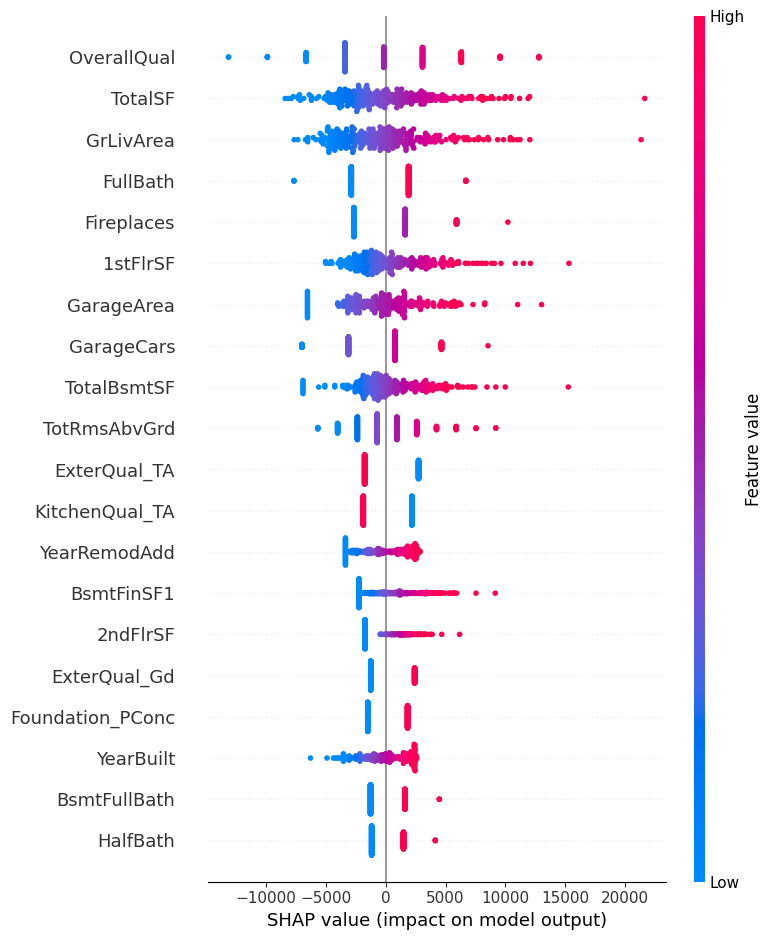

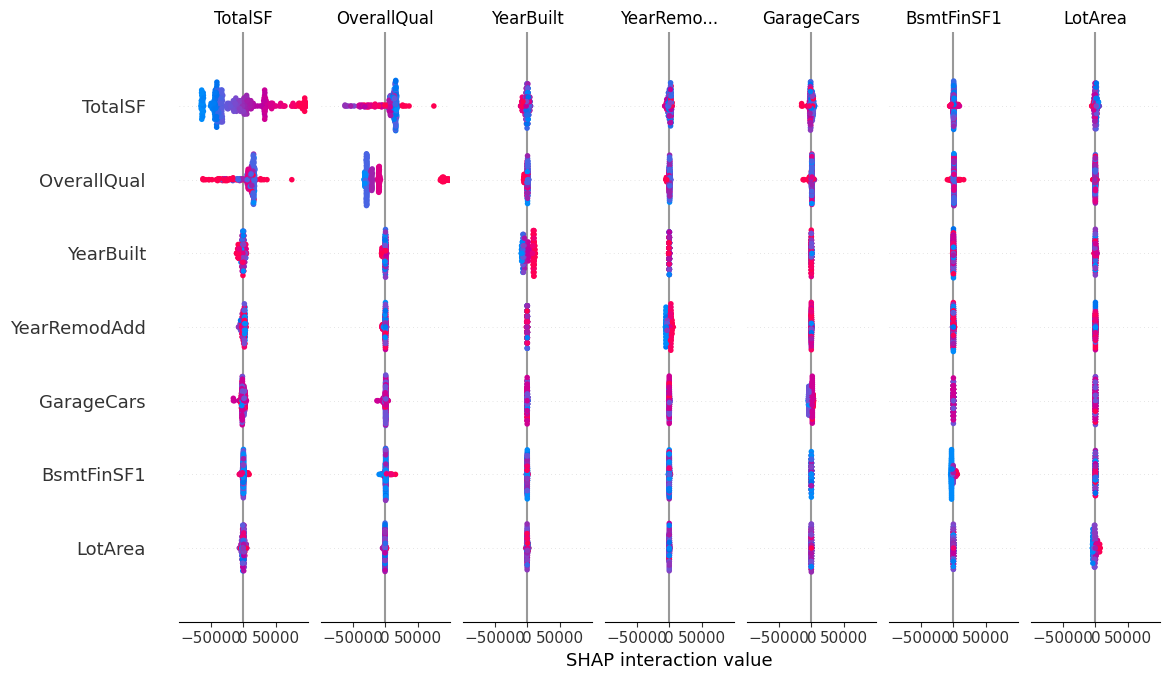

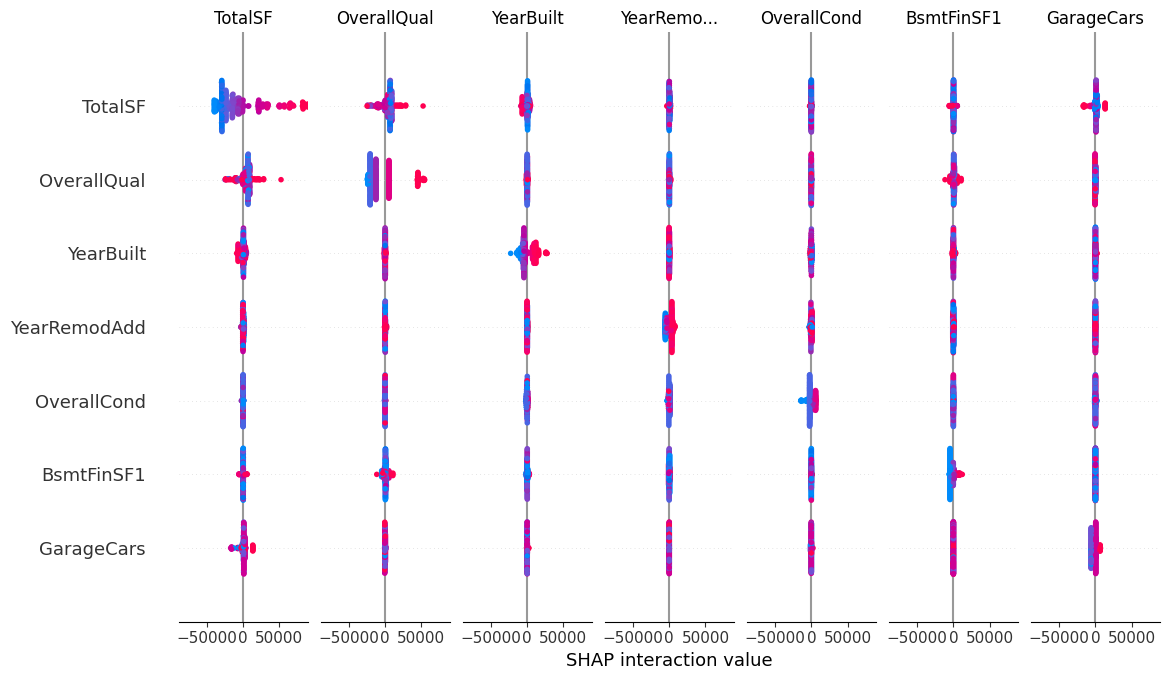

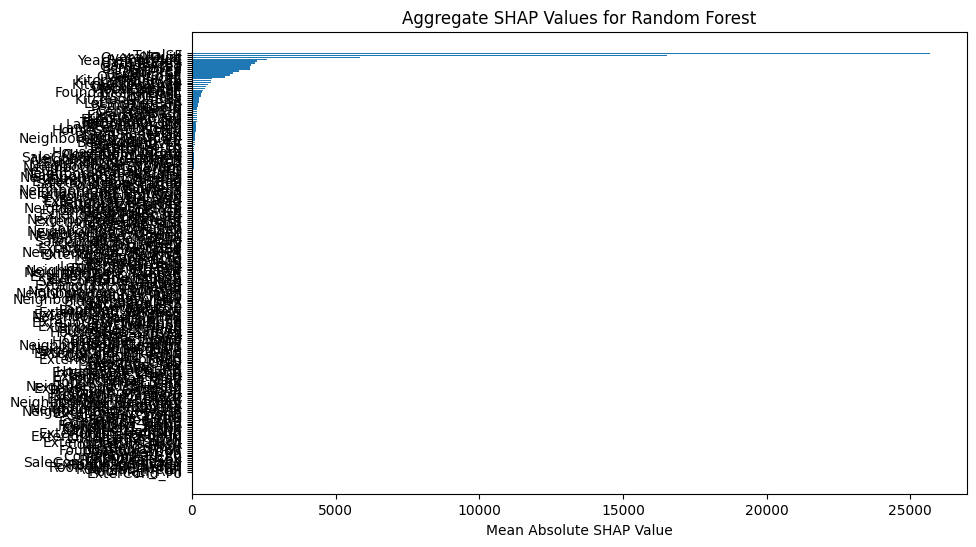

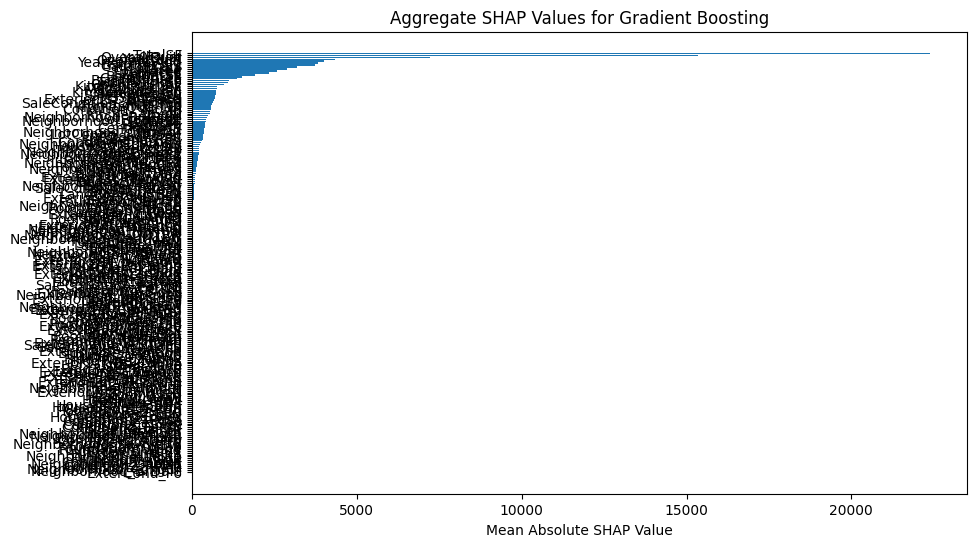

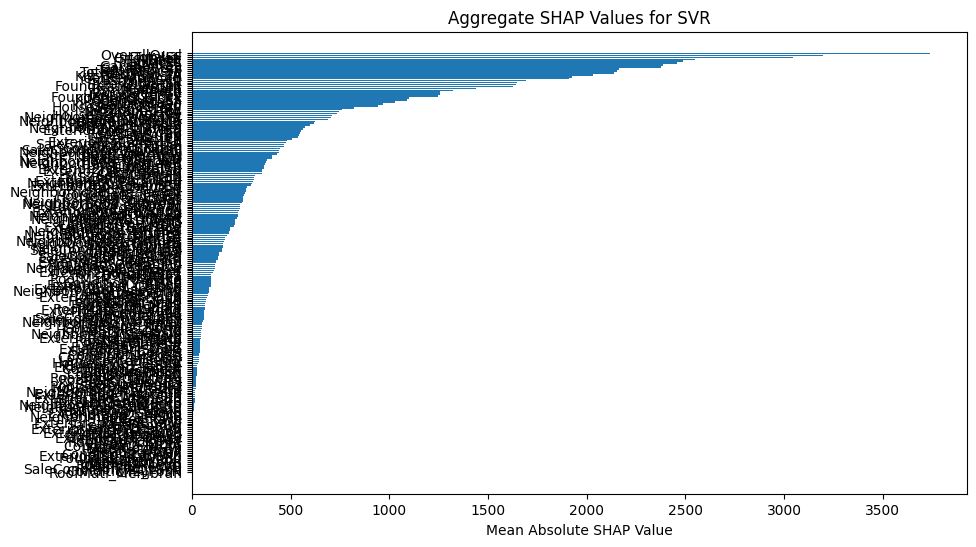

R2 Score: 0.9011932921620185
Mean Absolute Error: 15550.72250732553
Root Mean Squared Error: 27529.61461000774
      Actual Prices  Predicted Prices
892          154500     140183.844234
1105         325000     333257.466462
413          115000     104300.564737
522          159000     158721.460322
1036         315500     325117.855838
...             ...               ...
479           89471     115820.629818
1361         260000     254196.647294
802          189000     184011.087443
651          108000     114218.718494
722          124500     113923.151998

[292 rows x 2 columns]


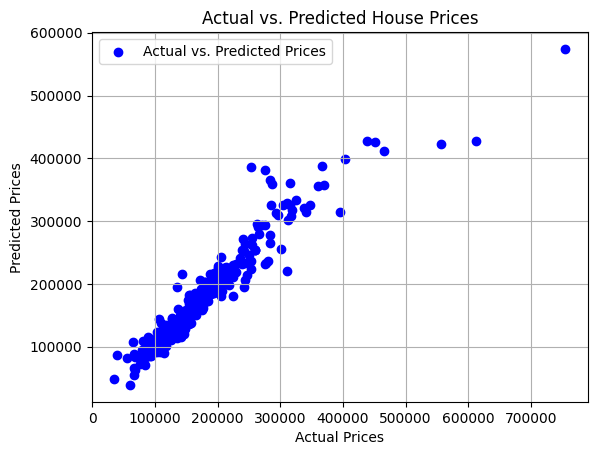

In [ ]:
# Apply SHAP to each base model separately
explainer_rfr = shap.Explainer(best_rfr, X_train)
shap_values_rfr = explainer_rfr(X_test)
shap.summary_plot(shap_values_rfr, X_test, feature_names=X.columns, title="Random Forest SHAP Values")

explainer_gbr = shap.Explainer(best_gbr, X_train)
shap_values_gbr = explainer_gbr(X_test)
shap.summary_plot(shap_values_gbr, X_test, feature_names=X.columns, title="Gradient Boosting SHAP Values")

explainer_svr = shap.Explainer(best_svr, X_train)
shap_values_svr = explainer_svr(X_test)
shap.summary_plot(shap_values_svr, X_test, feature_names=X.columns, title="SVR SHAP Values")
# Global feature importance
shap.summary_plot(shap_values_rfr, X_test, feature_names=X.columns, title="Random Forest SHAP Values")
shap.summary_plot(shap_values_gbr, X_test, feature_names=X.columns, title="Gradient Boosting SHAP Values")
shap.summary_plot(shap_values_svr, X_test, feature_names=X.columns, title="SVR SHAP Values")

# Interaction values
shap_interaction_values_rfr = shap.TreeExplainer(best_rfr).shap_interaction_values(X_test)
shap.summary_plot(shap_interaction_values_rfr, X_test, feature_names=X.columns, title="Random Forest SHAP Interaction Values")

shap_interaction_values_gbr = shap.TreeExplainer(best_gbr).shap_interaction_values(X_test)
shap.summary_plot(shap_interaction_values_gbr, X_test, feature_names=X.columns, title="Gradient Boosting SHAP Interaction Values")

# Aggregate analysis
def plot_aggregate_shap(shap_values, X, feature_names, model_name):
    mean_abs_shap = np.abs(shap_values.values).mean(axis=0)
    shap_importance = pd.DataFrame({
        'Feature': feature_names,
        'Mean Absolute SHAP': mean_abs_shap
    }).sort_values(by='Mean Absolute SHAP', ascending=False)
    plt.figure(figsize=(10, 6))
    plt.barh(shap_importance['Feature'], shap_importance['Mean Absolute SHAP'])
    plt.gca().invert_yaxis()
    plt.title(f"Aggregate SHAP Values for {model_name}")
    plt.xlabel('Mean Absolute SHAP Value')
    plt.show()

plot_aggregate_shap(shap_values_rfr, X_test, X.columns, "Random Forest")
plot_aggregate_shap(shap_values_gbr, X_test, X.columns, "Gradient Boosting")
plot_aggregate_shap(shap_values_svr, X_test, X.columns, "SVR")

# Make predictions
stacking_pred = stacking_model.predict(X_test)
evaluation_metrics(y_test, stacking_pred)
visualize_results(y_test, stacking_pred)